# Objective
This notebook include a code that analyze 

In [42]:
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

In [43]:
items_df = pd.read_csv("./data/items.csv")
items_categ_df = pd.read_csv("./data/item_categories.csv")
shops_df = pd.read_csv("./data/shops.csv")
sales_train_df = pd.read_csv("./data/sales_train.csv")
test_df = pd.read_csv("./data/test.csv")

In [44]:
items_df.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [45]:
items_categ_df.head(3)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


In [46]:
shops_df.head(3)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


In [47]:
sales_train_df.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [48]:
test_df.head(3)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233


In [49]:
mm=[]
for i in range(len(sales_train_df)):
    m = sales_train_df["date"].iloc[i].split(".")[1]
    mm.append(m)

sales_train_df["mounth"] = mm

In [50]:
pure_data = sales_train_df.groupby(['mounth','item_id','shop_id'], as_index=False).sum()

In [51]:
pure_data["spm"] = pure_data["item_cnt_day"] / 2.83

In [52]:
item_name = items_categ_df["item_category_name"]
items_categ_df["sub_cagetory"] = [i.split("-")[0].strip() for i in item_name]

prefix = shops_df["shop_name"]
shops_df["shop_pref"] = [p.split(" ")[0].strip() for p in prefix]

In [53]:
merge_data = pure_data.join(items_df.set_index('item_id'), on='item_id')
merge_data = merge_data.join(items_categ_df.set_index('item_category_id'), on='item_category_id')
merge_data = merge_data.join(shops_df.set_index('shop_id'), on='shop_id')

train_data = merge_data.drop(['shop_id', 'item_id' , 'item_category_id' , 'date_block_num'], axis=1)

In [54]:
train_data.head()

,mounth,item_price,item_cnt_day,spm,item_name,item_category_name,sub_cagetory,shop_name,shop_pref
0,01,28.0,1.0,0.353357,*ЗА ГРАНЬЮ СМЕРТИ D,Кино - DVD,Кино,"Химки ТЦ ""Мега""",Химки
1,01,28.0,1.0,0.353357,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,Кино - DVD,Кино,"Москва ТРК ""Атриум""",Москва
2,01,1890.0,1.0,0.353357,"007 Legends [PS3, русская версия]",Игры - PS3,Игры,"!Якутск ТЦ ""Центральный"" фран",!Якутск
3,01,2499.0,1.0,0.353357,"007 Legends [PS3, русская версия]",Игры - PS3,Игры,"Адыгея ТЦ ""Мега""",Адыгея
4,01,1890.0,1.0,0.353357,"007 Legends [PS3, русская версия]",Игры - PS3,Игры,Жуковский ул. Чкалова 39м?,Жуковский


In [55]:
train_data = train_data.rename(columns={'item_cnt_day': 'all_sales'})

In [56]:
test_df.head(3)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233


In [57]:
test_df['item_price'] = np.nan

In [58]:
lowr = []
    
    
vc = train_data["sub_cagetory"].value_counts()
vc = pd.DataFrame(vc)
vc['name'] = vc.index
vc.reset_index(drop=True, inplace=True)

for i in range(len(vc)):
    
    if vc.iloc[i,0] < 2000:
        
        lowr.append(vc.iloc[i]["name"])
            
for i in range(len(train_data)):   
       
    if train_data["sub_cagetory"].iloc[i] in lowr:
            
        train_data["sub_cagetory"].iloc[i] = "other"

In [59]:
train_data["item_name"].value_counts()

Call of Duty: Black Ops II [PС, Jewel, русская версия]                         599
Playstation Store пополнение бумажника: Карта оплаты 1000 руб.                 591
Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм                          591
Diablo III [PC, Jewel, русская версия]                                         589
Minecraft [Xbox 360, английская версия]                                        584
                                                                              ... 
ОРЕЛ ДЕВЯТОГО ЛЕГИОНА                                                            1
Наклейки одевайка бал арт. WMS002                                                1
Конструктор Шахта Зорр                                                           1
1С:Аудиокниги. Пушкин А. С. Евгений Онегин. Поэмы    [ PC, Цифровая версия]      1
BLACK SABBATH  Sabotage (фирм.)                                                  1
Name: item_name, Length: 21807, dtype: int64

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396971 entries, 0 to 1396970
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   mounth              1396971 non-null  object 
 1   item_price          1396971 non-null  float64
 2   all_sales           1396971 non-null  float64
 3   spm                 1396971 non-null  float64
 4   item_name           1396971 non-null  object 
 5   item_category_name  1396971 non-null  object 
 6   sub_cagetory        1396971 non-null  object 
 7   shop_name           1396971 non-null  object 
 8   shop_pref           1396971 non-null  object 
dtypes: float64(3), object(6)
memory usage: 106.6+ MB


In [61]:
train_data.describe()

,item_price,all_sales,spm
count,1.396971e+06,1.396971e+06,1.396971e+06
mean,1.872201e+03,2.611512e+00,9.227956e-01
std,6.857390e+03,1.205841e+01,4.260922e+00
min,9.000000e-02,-2.200000e+01,-7.773852e+00
25%,2.980000e+02,1.000000e+00,3.533569e-01
50%,5.970000e+02,1.000000e+00,3.533569e-01
75%,1.499000e+03,2.000000e+00,7.067138e-01
max,6.719300e+05,2.514000e+03,8.883392e+02


Text(0, 0.5, 'Counts')

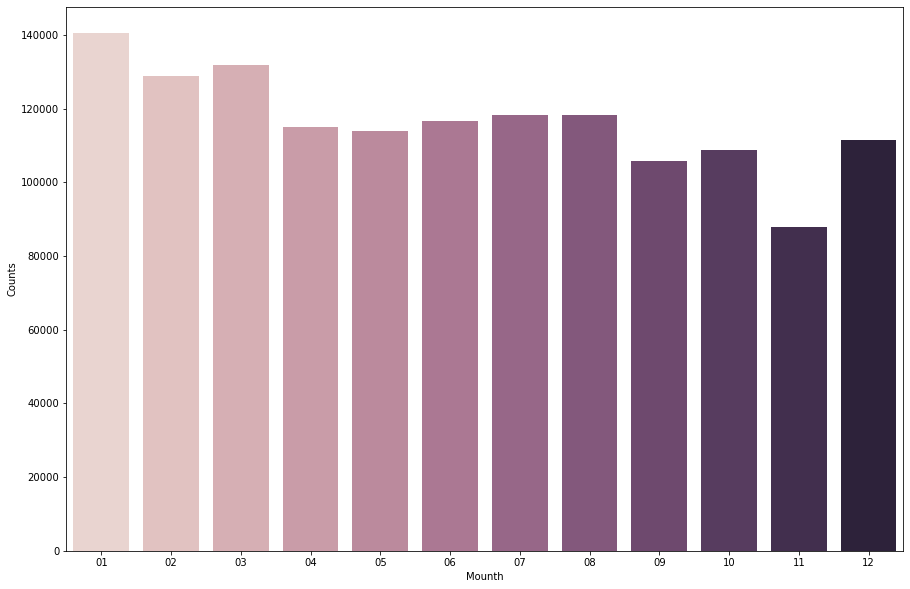

In [62]:
m=['01','02','03','04','05','06','07','08','09','10','11','12']

plt.figure(figsize=(15,10))
ax = sns.countplot(x = "mounth", data = train_data ,palette  = sns.cubehelix_palette(len(m)))
plt.xlabel('Mounth')
plt.ylabel('Counts')

In [63]:
import plotly.graph_objects as go
vc=train_data["sub_cagetory"].value_counts()

labels = vc.index
values = vc.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.1, 0])])
fig.show()

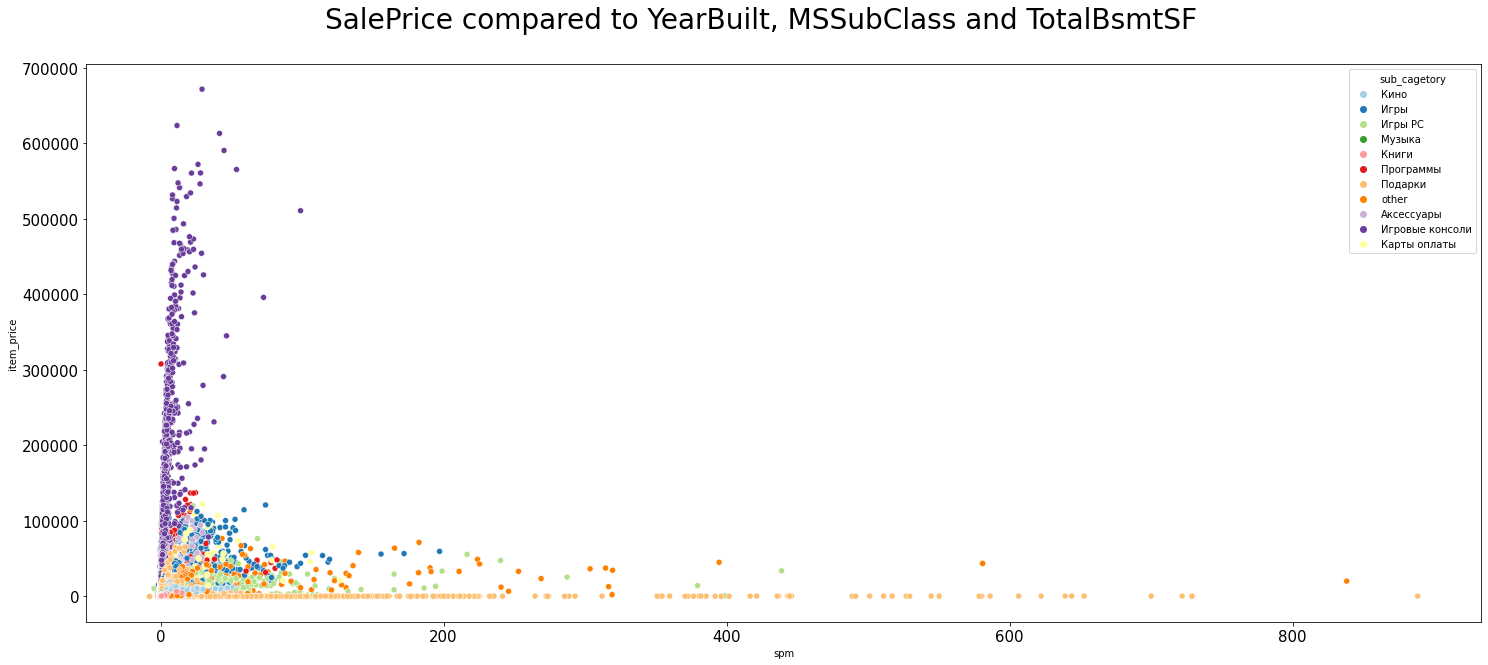

In [64]:
f, ax = plt.subplots(figsize=(25, 10))
ax.tick_params(labelsize=15)
sns.scatterplot(data=train_data, x="spm", y="item_price", hue="sub_cagetory", palette="Paired")
f.subplots_adjust(top=0.9)
f.suptitle('SalePrice compared to YearBuilt, MSSubClass and TotalBsmtSF', fontsize="28");

In [65]:
train_data.head(2)

,mounth,item_price,all_sales,spm,item_name,item_category_name,sub_cagetory,shop_name,shop_pref
0,01,28.0,1.0,0.353357,*ЗА ГРАНЬЮ СМЕРТИ D,Кино - DVD,Кино,"Химки ТЦ ""Мега""",Химки
1,01,28.0,1.0,0.353357,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,Кино - DVD,Кино,"Москва ТРК ""Атриум""",Москва


In [66]:
test_df.head(2)

,ID,shop_id,item_id,item_price
0,0,5,5037,NaN
1,1,5,5320,NaN


In [67]:
filling_data = train_data.copy()
filling_data = filling_data.drop(['mounth', 'all_sales' , 'item_price', 'item_name' ], axis=1)

y_fill = filling_data["spm"]
X_fill = filling_data.drop(['spm'], axis=1)

y_fill = pd.DataFrame(y_fill)
y_fill["spm"] = y_fill["spm"]

In [85]:
y_fill.shape

(1396971, 1)

In [68]:
X_fill = pd.get_dummies(X_fill, columns= ["item_category_name" , "sub_cagetory" , "shop_name" , "shop_pref"])

In [95]:
from sklearn.model_selection import train_test_split
X_fill_train, X_fill_test, y_fill_train, y_fill_test = train_test_split(X_fill, y_fill, test_size=0.8, random_state=42)

In [96]:
from sklearn import metrics

In [98]:
print(X_fill_train.shape)
print(y_fill_train.shape)

(279394, 187)
(279394, 1)


In [89]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_fill_train = ohe.fit_transform(y_fill_train).toarray()

In [90]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(200, input_dim=187, activation='relu'))
model.add(Dense(140, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [91]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [99]:
history = model.fit(X_fill_train, y_fill_train, epochs=100, batch_size=64)




Epoch 1/100





279394/279394 [==============================] - 23s 81us/step - loss: 19.7458 - mean_absolute_error: 0.6433
Epoch 2/100
279394/279394 [==============================] - 22s 79us/step - loss: 19.7397 - mean_absolute_error: 0.6377
Epoch 3/100
279394/279394 [==============================] - 23s 83us/step - loss: 19.7390 - mean_absolute_error: 0.6369
Epoch 4/100
279394/279394 [==============================] - 23s 82us/step - loss: 19.7379 - mean_absolute_error: 0.6357
Epoch 5/100
279394/279394 [==============================] - 23s 81us/step - loss: 19.7374 - mean_absolute_error: 0.6350
Epoch 6/100
279394/279394 [==============================] - 25s 89us/step - loss: 19.7369 - mean_absolute_error: 0.6342
Epoch 7/100
279394/279394 [==============================] - 25s 90us/step - loss: 19.7367 - mean_absolute_error: 0.6342
Epoch 8/100
279394/279394 [==============================] - 25s 89us/step - loss: 19.7366 - mean_absolute_error: 0.6340
Epoch 9/100
279394/27939

In [100]:
y_pred = model.predict(X_fill_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_fill_test)):
    test.append(np.argmax(y_fill_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)